In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import itertools

In [489]:
def Strategic_parameters(k_str):
    k = []
    k_ran_np = np.random.random(v-1)
    k_ran = [[i+1,k_ran_np[i]] for i in range(v-1)]
    for i in range(v):
        k_str[i].insert(0 , 0)
    for n in k_str:
        k_ran.insert(0,n)
        k_sub = []
        for m in k_ran:
            k_sub.append(m)
        k.append(k_sub)
        k_ran.pop(0)
    return k

In [314]:
def regression_analysis(M):
    a_i = np.random.randn(M) #N(0,1)に従う回帰係数
    a_2 = [n**2 for n in a_i]
    a_u2 = sum(a_2) #Yの分散(a_i^2の合計)
    b = [] #Y N(0,1)に従う時の回帰係数
    for n in a_i:
        c = np.sqrt(a_u2)
        b.append(n/c)
    B = np.abs(b)
    
    X = np.random.randn(M)
    y = []
    for n in range(len(b)):
        y.append(X[n]*b[n])
    Y = sum(y)
    return b,B

In [310]:
def probability():
    p = np.random.rand(M) #確率
    return p

In [646]:
def select(v,B,p,k):
    q = []
    for n in range(v): #プレイヤー人数
        e = np.random.rand(30)
        g = []
        for m in range(len(p)):
            if p[m]>e[m]:
                g.append(m)
        q.append(g)
    Q = []
    for n in range(len(q)):
        z = k[0][1]*B[0]-(1-k[0][1])*p[0]
        w = None
        for m in q[n]:
            if k[n][1]*B[m]-(1-k[n][1])*p[m] > z:
                z = k[n][1]*B[m]-(1-k[n][1])*p[m]
                w = m
        Q.append(w)
    return Q

In [675]:
def Shapley_value(Q,B):
    gain_Sh = [[i,0] for i in V] #シャープレイ値による利得
    Sh = []
    for i in Q:
        count = Q.count(i)
        Sh.append(B[i]**2/count)
    Sh_sum = sum(Sh)
    Sh_per = [i/Sh_sum for i in Sh]
    for n in range(len(gain_Sh)):
        gain_Sh[n][1] += Sh_per[n]*100
    return gain_Sh

In [677]:
def ranking_value(Q,B):
    gain_Rank = [[i,0] for i in V] #ランキングによる利得
    Rank = []
    for n in range(v):
        Rank.append([n,Q[n],B[Q[n]]])
    Rank = sorted(Rank, key=lambda x: x[2],reverse = True)
    count1 = 0
    count2 = 0
    count3 = 0
    count_sum = 0
    for i in range(len(Rank)):
        if Rank[0][1] == Rank[i][1]:
            count1 += 1
    count_sum += count1
    if count_sum < 2:
        for i in range(len(Rank)):
            if Rank[count_sum][1] == Rank[i][1]:
                count2 += 1
    count_sum += count2
    if count_sum < 3:
        for i in range(len(Rank)):
            if Rank[count_sum][1] == Rank[i][1]:
                count3 += 1
    count_sum += count3

    if count1 >= 3:
        point = 100/count1
        for i in range(count1):
            gain_Rank[Rank[i][0]][1] += point
    if count1 == 2:
        for i in range(count_sum):
            if i < 2:
                gain_Rank[Rank[i][0]][1] += 100*3/7
            else:
                gain_Rank[Rank[i][0]][1] += 100/7/count3
    if count1 == 1:
        if count2 >= 2:
            for i in range(count_sum):
                if i == 0:
                    gain_Rank[Rank[i][0]][1] += 100*4/7
                else:
                    gain_Rank[Rank[i][0]][1] += 100*3/7/count2
        else:
            for i in range(count_sum):
                if i == 0:
                    gain_Rank[Rank[i][0]][1] += 100*4/7
                elif i == 1:
                    gain_Rank[Rank[i][0]][1] += 100*2/7
                else:
                    gain_Rank[Rank[i][0]][1] += 100/7/count3
    return gain_Rank


In [ ]:
M = 30 #説明変数の数
v = 10 #プレイヤー人数
V = [i for i in range(v)] #プレイヤー集合

In [ ]:
k_str = [[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9]] #戦略パラメータ

In [672]:
gain_Sh_sum = [[i,0] for i in range(v)]
gain_Rank_sum = [[i,0] for i in range(v)]

In [670]:
k = Strategic_parameters(k_str)

In [671]:
b,B = regression_analysis(M)
p = probability()

In [697]:
for n in range(10):
    for i in range(len(k)):
        Q = select(v,B,p,k[i])
        gain_Sh = Shapley_value(Q,B)
        gain_Sh_sum[i][1] += gain_Sh[0][1]
        gain_Rank = ranking_value(Q,B)
        gain_Rank_sum[i][1] += gain_Rank[0][1]
    

In [698]:
print(gain_Sh_sum)
print(gain_Rank_sum)

[[0, 198.44429195260565], [1, 243.51104387498626], [2, 214.76557429442042], [3, 284.01003585708713], [4, 274.54579739378505], [5, 229.42310338963975], [6, 235.05126648200573], [7, 234.28151828862303], [8, 217.85950770444754], [9, 242.41122178291815]]
[[0, 35.71428571428571], [1, 47.61904761904762], [2, 56.19047619047618], [3, 53.57142857142857], [4, 102.3809523809524], [5, 65.47619047619047], [6, 33.333333333333336], [7, 109.52380952380953], [8, 91.66666666666666], [9, 35.714285714285715]]


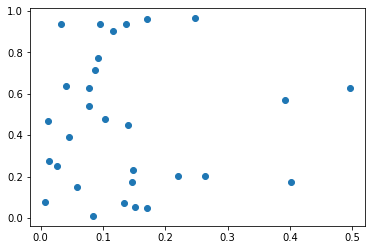

In [699]:
plt.scatter(B,p)